# TASK 2b

In [1]:
#import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
pd.set_option('display.max_colwidth', 160)
import warnings
warnings.filterwarnings('ignore')

In [2]:
input_file = "sample-superstore_2023_T3_clean.csv"
df1 = pd.read_csv(input_file, header = 0)
df1.head(10)

,Row ID,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Customer ID,...,Segment,Country,City,State,Postal Code,Region,Order ID,Order Date,Ship Date,Ship Mode
0,9798,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188,2,0.4,-43.1178,CS-12490,...,Corporate,United States,Toledo,Ohio,43615,East,CA-2015-128608,2015-01-12,2015-01-17,Standard Class
1,5065,TEC-PH-10004977,Technology,Phones,GE 30524EE4,391.980,2,0.0,113.6742,CA-12265,...,Consumer,United States,Wilmington,Delaware,19805,East,CA-2017-122196,2017-09-22,2017-09-24,First Class
2,7502,TEC-PH-10004977,Technology,Phones,GE 30524EE4,470.376,3,0.2,52.9173,TC-21295,...,Consumer,United States,Westminster,California,92683,West,CA-2017-121048,2017-07-14,2017-07-18,Standard Class
3,9728,TEC-PH-10004977,Technology,Phones,GE 30524EE4,979.950,5,0.0,284.1855,KM-16720,...,Consumer,United States,Lowell,Massachusetts,1852,East,CA-2017-167395,2017-12-02,2017-12-04,First Class
4,582,TEC-PH-10004977,Technology,Phones,GE 30524EE4,470.376,3,0.2,52.9173,DV-13465,...,Consumer,United States,Denver,Colorado,80219,West,CA-2017-145233,2017-12-01,2017-12-05,Standard Class
5,7478,TEC-PH-10004977,Technology,Phones,GE 30524EE4,391.980,2,0.0,113.6742,ME-17320,...,Home Office,United States,Henderson,Kentucky,42420,South,CA-2014-167199,2014-01-06,2014-01-10,Standard Class
6,36,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737,GH-14485,...,Corporate,United States,Richardson,Texas,75080,Central,CA-2016-117590,2016-12-08,2016-12-10,First Class
7,3132,TEC-PH-10004977,Technology,Phones,GE 30524EE4,627.168,4,0.2,70.5564,CC-12100,...,Home Office,United States,Los Angeles,California,90049,West,CA-2014-136399,2014-12-16,2014-12-17,First Class
8,6636,TEC-PH-10004977,Technology,Phones,GE 30524EE4,627.168,4,0.2,70.5564,MB-18085,...,Consumer,United States,Charlotte,North Carolina,28205,South,CA-2017-144498,2017-06-05,2017-06-05,Same Day
9,3331,TEC-PH-10004959,Technology,Phones,Classic Ivory Antique Telephone ZL1810,241.176,3,0.2,15.0735,KD-16270,...,Consumer,United States,Houston,Texas,77095,Central,CA-2014-165309,2014-11-11,2014-11-15,Standard Class


In [3]:
len(df1)

9994

In [4]:
print(df1.columns)

Index(['Row ID', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode'],
      dtype='object')


In [5]:
#Check updated missing value in df
df1.isnull().sum()

Row ID           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
dtype: int64

In [6]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])
print(df1.dtypes)

Row ID                    int64
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
dtype: object


## Analyze Dataset Before Removing Outliers and Normalizing

### To investigate the preferred shopping times (specific dates/months)

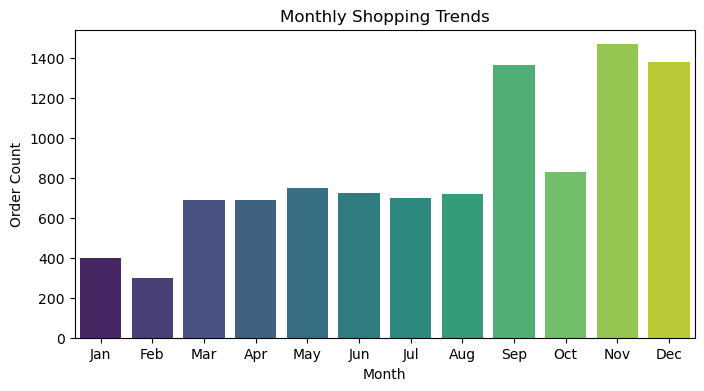

In [7]:
df1['Year_Order'] = df1['Order Date'].dt.year
df1['Month_Order'] = df1['Order Date'].dt.month
df1['Day_Order'] = df1['Order Date'].dt.day
monthly_trends = df1.groupby('Month_Order')['Order ID'].count().reset_index()
monthly_trends.columns = ['Month_Order', 'Order Count']
daily_trends = df1.groupby(['Year_Order', 'Month_Order', 'Day_Order'])['Order ID'].count().reset_index()
daily_trends.columns = ['Year', 'Month', 'Day', 'Order Count']
plt.figure(figsize=(8, 4))
sns.barplot(x='Month_Order', y='Order Count', data=monthly_trends, palette='viridis')
plt.title('Monthly Shopping Trends')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<span style="color: blue;"> Result: Higher purchasing activity during September, November, and December</span>

### To find the most profitable products

In [8]:
# Group data by 'Product Name' and sum up the profits
profit_by_product = df1.groupby('Product Name')['Profit'].sum().reset_index()

# Sort the products by profit in descending order to get the most profitable products at the top
profit_by_product_sorted = profit_by_product.sort_values('Profit', ascending=False)
profit_by_product_sorted.head(5)

,Product Name,Profit
404,Canon imageCLASS 2200 Advanced Copier,25199.9280
650,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
805,Hewlett Packard LaserJet 3310 Copier,6983.8836
400,Canon PC1060 Personal Laser Copier,4570.9347
787,"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766


### To find the most profitable 'Product Name' in each 'Region'

In [9]:
# Group by 'Region' and 'Product Name', summing up the profits
profit_by_product_region = df1.groupby(['Region', 'Product Name'])['Profit'].sum().reset_index()

# Sort the results within each 'Region' by 'Profit' in descending order to get the most profitable products at the top
profit_by_product_region_sorted = profit_by_product_region.sort_values(['Region', 'Profit'], ascending=[True, False])

# Drop duplicates keeping the first most profitable entry for each 'Region'
most_profitable_product_per_region = profit_by_product_region_sorted.drop_duplicates(subset=['Region'], keep='first')
most_profitable_product_per_region

,Region,Product Name,Profit
283,Central,Canon imageCLASS 2200 Advanced Copier,8399.9760
1602,East,Canon imageCLASS 2200 Advanced Copier,10079.9712
2705,Est,GBC Recycled Grain Textured Covers,-22.7964
3084,South,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,3812.9700
4081,West,Canon imageCLASS 2200 Advanced Copier,6719.9808


### Group data by 'Region' and 'Category' to see sales volume

In [10]:
category_sales_region = df1.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()
category_sales_region

,Region,Category,Quantity
0,Central,Furniture,1799
1,Central,Office Supplies,5375
2,Central,Technology,1544
3,East,Furniture,2210
4,East,Office Supplies,6439
5,East,Technology,1914
6,Est,Furniture,5
7,Est,Office Supplies,17
8,Est,Technology,12
9,South,Furniture,1306


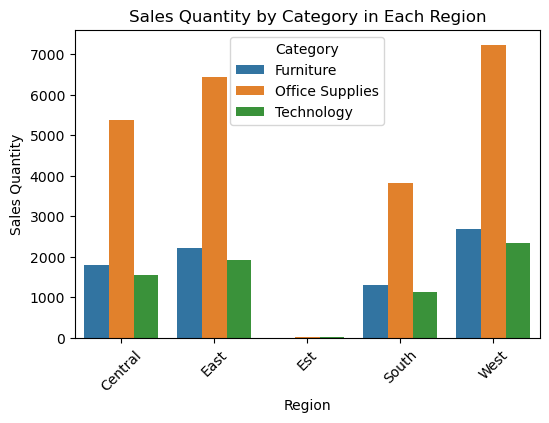

In [11]:
# Plotting sales by category in each region
plt.figure(figsize=(6, 4))
sns.barplot(x='Region', y='Quantity', hue='Category', data=category_sales_region)
plt.title('Sales Quantity by Category in Each Region')
plt.ylabel('Sales Quantity')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

### Analyze Consumer Preferences for Discounts by Region

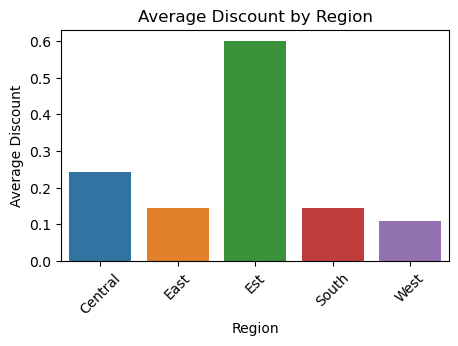

In [12]:
# Group data by 'Region' and calculate the average discount
average_discount_region = df1.groupby('Region')['Discount'].mean().reset_index()

# Average discount by region
plt.figure(figsize=(5, 3))
sns.barplot(x='Region', y='Discount', data=average_discount_region)
plt.title('Average Discount by Region')
plt.ylabel('Average Discount')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

### Profit Margins by Region

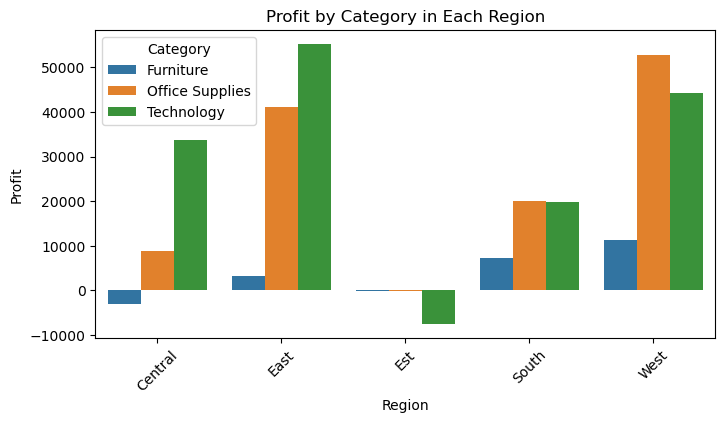

In [13]:
# Group data by 'Region' and 'Category' to see profit margins
profit_by_region = df1.groupby(['Region', 'Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='Region', y='Profit', hue='Category', data=profit_by_region)
plt.title('Profit by Category in Each Region')
plt.ylabel('Profit')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

### To compare how much items were purchased at discount prices, compared to regular prices

In [14]:
# Count items purchased with a discount
discounted_items = df1[df1['Discount'] > 0]['Quantity'].sum()

# Count items purchased without a discount
regular_price_items = df1[df1['Discount'] == 0]['Quantity'].sum()

print(f"Items purchased at discount prices: {discounted_items}")
print(f"Items purchased at regular prices: {regular_price_items}")

Items purchased at discount prices: 19565
Items purchased at regular prices: 18267


<span style="color: blue;"> Result: More items purchased at discount prices, compared to regular prices</span>

## Removing Outliers and Normalizing

### Use z-score to identify and remove outliers in ['Sales', 'Quantity', 'Discount', 'Profit']

In [15]:
z_scores = zscore(df1[['Sales', 'Quantity', 'Discount', 'Profit']])
df1_no_outliers = df1[(abs(z_scores) < 3).all(axis=1)]

### Standardize/ Normalize/ Scaling the variables

In [16]:
scaler = MinMaxScaler() # Apply Min-Max scaling
numerical_vars = ['Sales', 'Quantity', 'Discount', 'Profit']
df1_no_outliers[numerical_vars] = scaler.fit_transform(df1_no_outliers[numerical_vars])
df1_no_outliers[numerical_vars].head(3)

,Sales,Quantity,Discount,Profit
0,0.112740,0.2,0.571429,0.450216
1,0.188174,0.2,0.000000,0.565907
2,0.225890,0.3,0.285714,0.521077


## Analyze Dataset After Removing Outliers and Normalizing

### To investigate the preferred shopping times (specific dates/months)

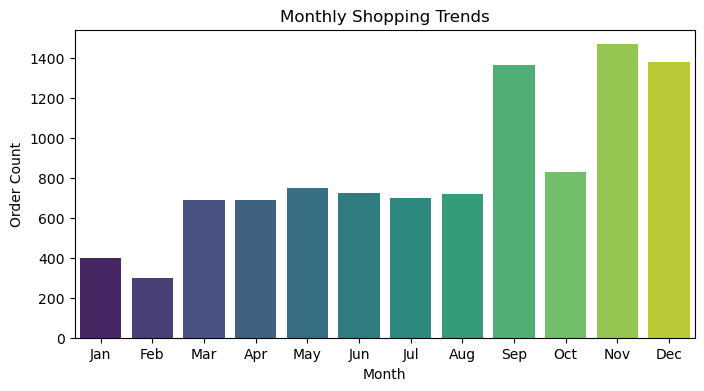

In [17]:
df1_no_outliers['Year_Order'] = df1_no_outliers['Order Date'].dt.year
df1_no_outliers['Month_Order'] = df1_no_outliers['Order Date'].dt.month
df1_no_outliers['Day_Order'] = df1_no_outliers['Order Date'].dt.day
monthly_trends = df1.groupby('Month_Order')['Order ID'].count().reset_index()
monthly_trends.columns = ['Month_Order', 'Order Count']
daily_trends = df1_no_outliers.groupby(['Year_Order', 'Month_Order', 'Day_Order'])['Order ID'].count().reset_index()
daily_trends.columns = ['Year', 'Month', 'Day', 'Order Count']
plt.figure(figsize=(8, 4))
sns.barplot(x='Month_Order', y='Order Count', data=monthly_trends, palette='viridis')
plt.title('Monthly Shopping Trends')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### To find the most profitable products

In [18]:
# Group data by 'Product Name' and sum up the profits
profit_by_product = df1_no_outliers.groupby('Product Name')['Profit'].sum().reset_index()

# Sort the products by profit in descending order to get the most profitable products at the top
profit_by_product_sorted = profit_by_product.sort_values('Profit', ascending=False)
print(profit_by_product_sorted.head(5))

                 Product Name     Profit
1475          Staple envelope  23.692100
529         Easy-staple paper  22.982156
1481                  Staples  20.909943
1482  Staples in misc. colors   8.761597
1478           Staple remover   8.694322


### To find the most profitable 'Product Name' in each 'Region'

In [19]:
# Group by 'Region' and 'Product Name', summing up the profits
profit_by_product_region = df1_no_outliers.groupby(['Region', 'Product Name'])['Profit'].sum().reset_index()

# Sort the results within each 'Region' by 'Profit' in descending order to get the most profitable products at the top
profit_by_product_region_sorted = profit_by_product_region.sort_values(['Region', 'Profit'], ascending=[True, False])

# Drop duplicates keeping the first most profitable entry for each 'Region'
most_profitable_product_per_region = profit_by_product_region_sorted.drop_duplicates(subset=['Region'], keep='first')
most_profitable_product_per_region

,Region,Product Name,Profit
320,Central,Easy-staple paper,6.511216
2278,East,Staple envelope,8.448828
2543,Est,Catalog Binders with Expanding Posts,0.815133
2837,South,Easy-staple paper,4.490521
4767,West,Staples,6.319771


<span style="color: green;">The different results show how outliers can significantly impact analysis. 
Outliers might represent very successful products or sales that are not typical but greatly affect total profit.</span>

### Group data by 'Region' and 'Category' to see sales volume

In [20]:
category_sales_region = df1_no_outliers.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()
category_sales_region

,Region,Category,Quantity
0,Central,Furniture,171.3
1,Central,Office Supplies,404.8
2,Central,Technology,144.0
3,East,Furniture,202.9
4,East,Office Supplies,619.3
5,East,Technology,171.5
6,Est,Furniture,0.5
7,Est,Office Supplies,1.7
8,South,Furniture,120.1
9,South,Office Supplies,361.8


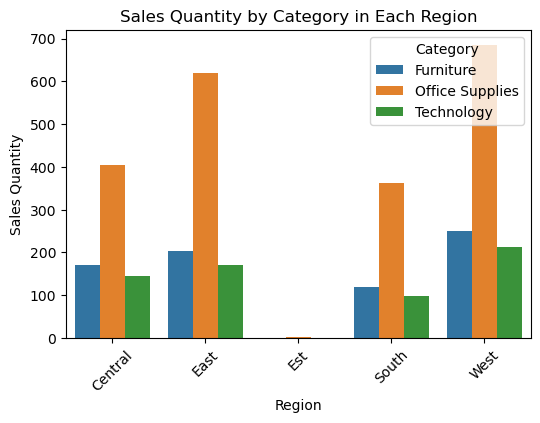

In [21]:
# Plotting sales by category in each region
plt.figure(figsize=(6, 4))
sns.barplot(x='Region', y='Quantity', hue='Category', data=category_sales_region)
plt.title('Sales Quantity by Category in Each Region')
plt.ylabel('Sales Quantity')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

### Analyze Consumer Preferences for Discounts by Region

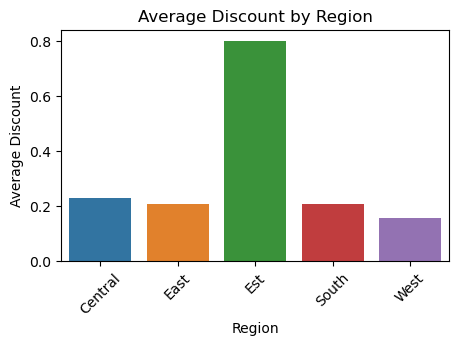

In [22]:
# Group data by 'Region' and calculate the average discount
average_discount_region = df1_no_outliers.groupby('Region')['Discount'].mean().reset_index()

# Average discount by region
plt.figure(figsize=(5, 3))
sns.barplot(x='Region', y='Discount', data=average_discount_region)
plt.title('Average Discount by Region')
plt.ylabel('Average Discount')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

### Profit Margins by Region

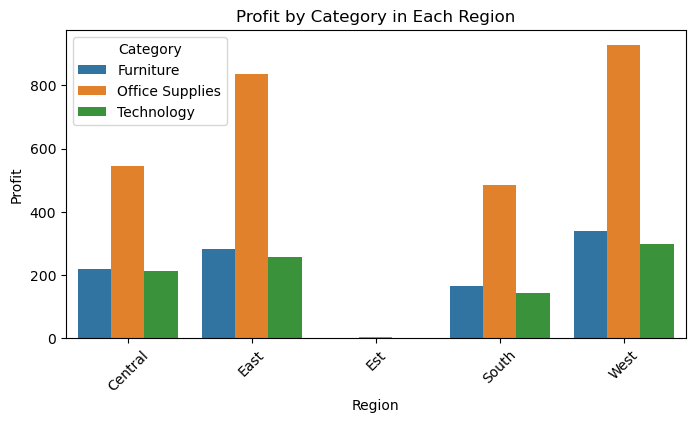

In [23]:
# Group data by 'Region' and 'Category' to see profit margins
profit_by_region = df1_no_outliers.groupby(['Region', 'Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='Region', y='Profit', hue='Category', data=profit_by_region)
plt.title('Profit by Category in Each Region')
plt.ylabel('Profit')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

### To compare how much items were purchased at discount prices, compared to regular prices

In [24]:
# Count items purchased with a discount
discounted_items = df1_no_outliers[df1_no_outliers['Discount'] > 0]['Quantity'].sum()

# Count items purchased without a discount
regular_price_items = df1_no_outliers[df1_no_outliers['Discount'] == 0]['Quantity'].sum()

print(f"Items purchased at discount prices: {discounted_items}")
print(f"Items purchased at regular prices: {regular_price_items}")

Items purchased at discount prices: 1727.8000000000002
Items purchased at regular prices: 1716.5


<span style="color: green;"> Result: More items purchased at discount prices, compared to regular prices</span>

## Descriptive Statistic

In [25]:
print(df1_no_outliers.describe())

            Row ID        Sales     Quantity     Discount       Profit  \
count  9436.000000  9436.000000  9436.000000  9436.000000  9436.000000   
mean   4984.802459     0.085236     0.365017     0.194221     0.498942   
std    2878.527850     0.140869     0.200884     0.249483     0.059542   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%    2483.750000     0.008202     0.200000     0.000000     0.483687   
50%    4990.500000     0.025755     0.300000     0.142857     0.488583   
75%    7462.250000     0.095801     0.500000     0.285714     0.503250   
max    9994.000000     1.000000     1.000000     1.000000     1.000000   

        Year_Order  Month_Order    Day_Order  
count  9436.000000  9436.000000  9436.000000  
mean   2015.724989     7.782217    15.492794  
std       1.121233     3.289035     8.722432  
min    2014.000000     1.000000     1.000000  
25%    2015.000000     5.000000     8.000000  
50%    2016.000000     9.000000    15.000000  
75% 

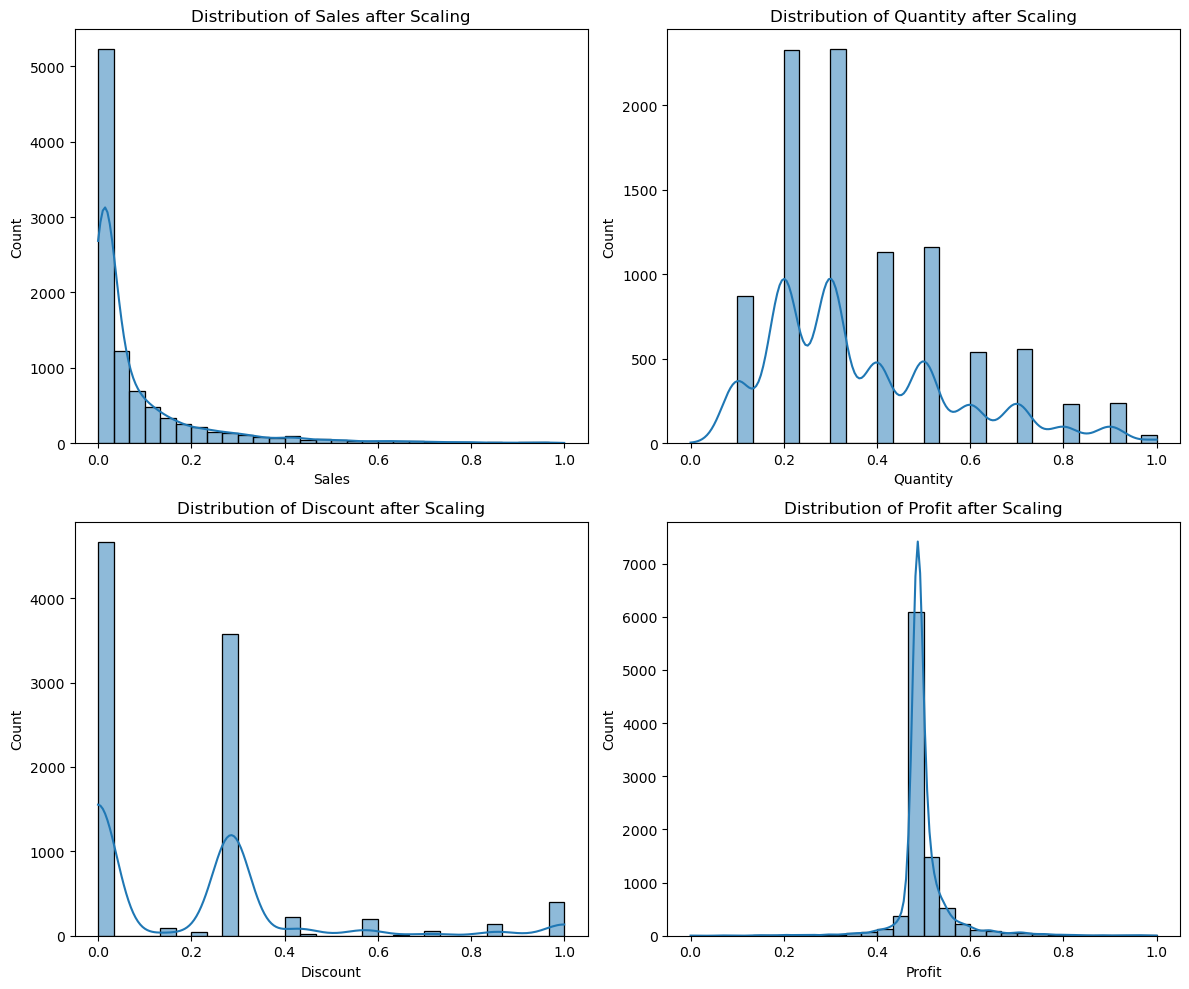

In [26]:
plt.figure(figsize=(12, 10))

for i, var in enumerate(numerical_vars):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df1_no_outliers[var], bins=30, kde=True)
    plt.title(f'Distribution of {var} after Scaling')

plt.tight_layout()
plt.show()

# Task 3

### Sumarization of the methods (200words)

## Correlation Analysis for Numerical Dataset

In [27]:
correlation_matrix = df1_no_outliers[numerical_vars].corr()
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.251509 -0.010596  0.449966
Quantity  0.251509  1.000000  0.001035  0.123694
Discount -0.010596  0.001035  1.000000 -0.359503
Profit    0.449966  0.123694 -0.359503  1.000000


### Calculate the correlation matrix for the numerical variables

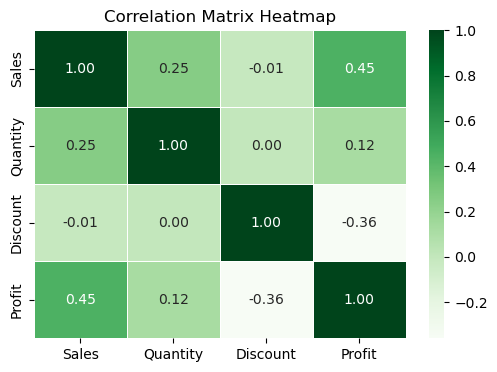

In [28]:
# Plotting the correlation heatmap
# cmap: viridis, plasma, magma, inferno, Blues,Greens, Greys, coolwarm, RdBu, Spectral, cividis, twilight

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Interpretation:

Discount and Profit (-0.359503): A moderate negative correlation between Discount and Profit. The higher discounts associated with lower profits. Discounts might increase sales volume or quantity, it may reduce profit margins.

Discount and Sales (-0.010596): Here is a negative correlation between Sales and Discount. Discounts may not have a strong direct impact on increasing sales volume.

Sales and Profit (0.449966): A moderate positive correlation between Sales and Profit. As Sales increase, Profit tends to increase as well.

Sales and Quantity (0.251509): A mild positive correlation between Sales and Quantity. The higher quantities sold, the higher sales might be, but the relationship is not as strong as between Sales and Profit.


## Bivariate Analysis of Numerical vs Numerical Variables

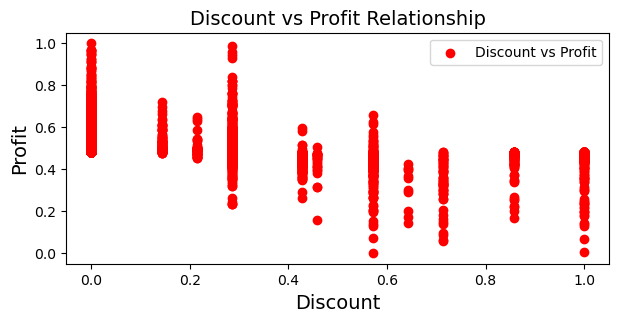

In [29]:
# plot the dataframes for Discount vs Profit columns in df1_no_outliers

plt.rcParams["figure.figsize"] = [7, 3]
plt.scatter(df1_no_outliers['Discount'], df1_no_outliers['Profit'], color='red', label='Discount vs Profit')
plt.title("Discount vs Profit Relationship", size=14)
plt.xlabel("Discount", size=14)
plt.ylabel("Profit", size=14)  
plt.legend()
plt.show()

<span style="color: red;"> Interpretation: Offering greater discounts does not lead to increased Profit</span>

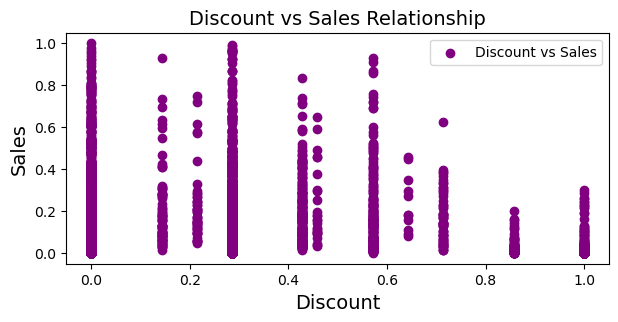

In [30]:
# plot the dataframes for Discount vs Sales columns in df1_no_outliers

plt.rcParams["figure.figsize"] = [7, 3]
plt.scatter(df1_no_outliers['Discount'], df1_no_outliers['Sales'], color='purple', label='Discount vs Sales')
plt.title("Discount vs Sales Relationship", size=14)
plt.xlabel("Discount", size=14)
plt.ylabel("Sales", size=14)  
plt.legend()
plt.show()

<span style="color: purple;"> Interpretation: Providing higher discounts does not lead to increased sales.</span>

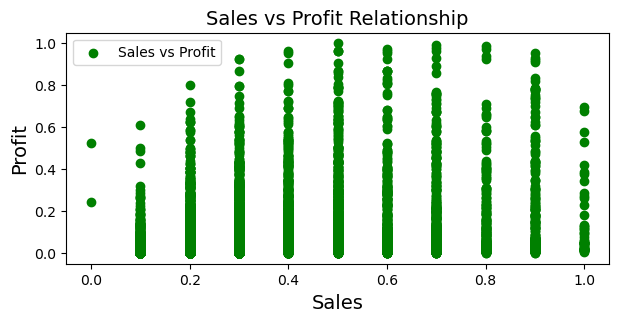

In [31]:
# plot the dataframes for Sales vs Profit in df1_no_outliers

plt.rcParams["figure.figsize"] = [7, 3]
plt.scatter(df1_no_outliers['Quantity'], df1_no_outliers['Sales'], color='green', label='Sales vs Profit')
plt.title("Sales vs Profit Relationship", size=14)
plt.xlabel("Sales", size=14)
plt.ylabel("Profit", size=14)  
plt.legend()
plt.show()

<span style="color: green;"> Interpretation: higher sales may lead to higher profit</span>

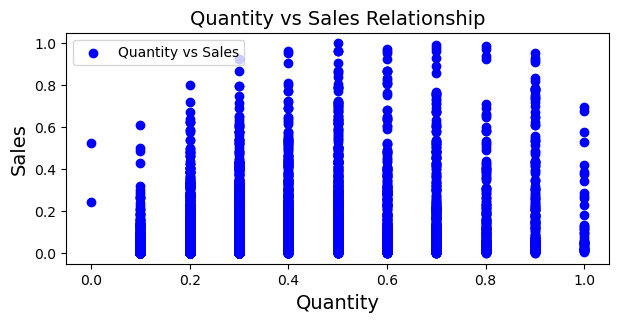

In [32]:
# plot the dataframes for Quantity vs Sales columns in df1_no_outliers

plt.rcParams["figure.figsize"] = [7, 3]
plt.scatter(df1_no_outliers['Quantity'], df1_no_outliers['Sales'], color='blue', label='Quantity vs Sales')
plt.title("Quantity vs Sales Relationship", size=14)
plt.xlabel("Quantity", size=14)
plt.ylabel("Sales", size=14)  
plt.legend()
plt.show()

<span style="color: blue;">Interpretation: Higher quantities sold may lead to higher sales.</span>

## Bivariate Analysis of Two Categorical Variables (Segments vs Ship Mode)

In [33]:
# cross-tabulation (contingency table)
crosstab = pd.crosstab(df1_no_outliers['Segment'], df1['Ship Mode'])
crosstab

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,733,306,971,2890
Corporate,460,107,578,1709
Home Office,265,105,301,1011


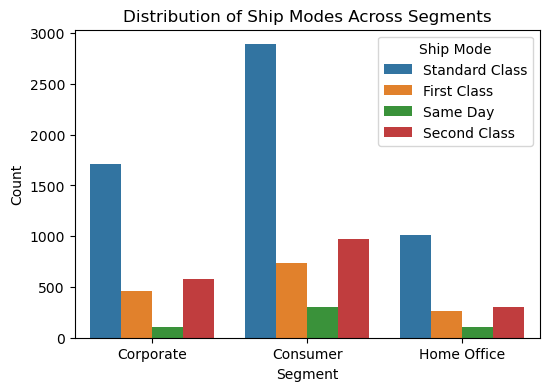

In [34]:
# Bar chart of 'Segment' and 'Ship Mode'
plt.figure(figsize=(6, 4))
sns.countplot(x='Segment', hue='Ship Mode', data=df1_no_outliers)
plt.title('Distribution of Ship Modes Across Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.legend(title='Ship Mode')
plt.show()

<span style="color: green;">Interpretation: Standard Class is the preferred mode of shipping across all segments.</span>

## Bivariate Analysis of Categorical vs Numerical Variables 

### Finding the State with the Highest and Lowest Average Profit

In [44]:
# Group by 'State' and calculate mean profit
mean_profits_by_state = df1_no_outliers.groupby('State')['Profit'].mean().reset_index()

# Sort states by mean profit in descending order
mean_profits_by_state_sorted = mean_profits_by_state.sort_values('Profit', ascending=False)
top_state_by_mean_profit = mean_profits_by_state_sorted.head(10)
top_state_by_mean_profit

,State,Profit
7,District of Columbia,0.560214
48,Wyoming,0.555962
43,Vermont,0.549680
34,Oklahoma,0.536866
47,Wisconsin,0.534488
0,Alabama,0.534105
12,Indiana,0.525786
37,Rhode Island,0.524508
18,Maryland,0.522899
15,Kentucky,0.522270


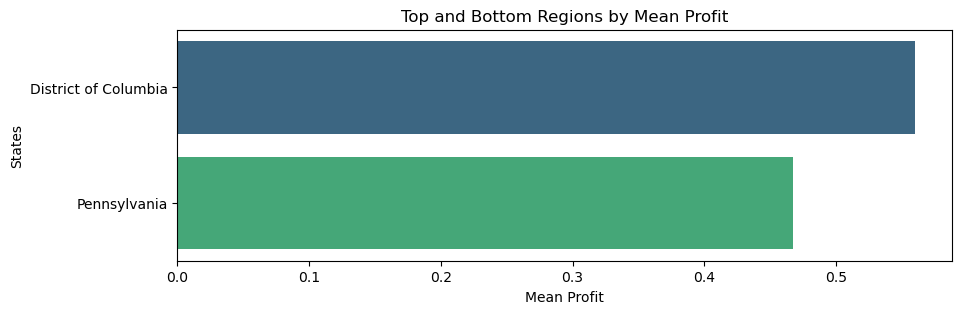

In [52]:
# Top State by mean profit
top_states = mean_profits_by_state_sorted.head(1)

# Bottom Region by mean profit
bottom_states = mean_profits_by_state_sorted.tail(1)

# Combining top and bottom for visualization
combined_states = pd.concat([top_states, bottom_states])

plt.figure(figsize=(10, 3))
sns.barplot(x='Profit', y='State', data=combined_states, palette='viridis')
plt.title('Top and Bottom Regions by Mean Profit')
plt.xlabel('Mean Profit')
plt.ylabel('States')
plt.show()

### Finding the State with the Highest and Lowest Average Sales

In [54]:
# Group by 'State' and calculate mean Sales
mean_sales_by_state = df1_no_outliers.groupby('State')['Sales'].mean().reset_index()

# Sort states by mean sales in descending order
mean_sales_by_state_sorted = mean_sales_by_state.sort_values('Sales', ascending=False)
top_state_by_mean_sales = mean_sales_by_state_sorted.head(10)
top_state_by_mean_sales

,State,Sales
48,Wyoming,0.770867
43,Vermont,0.157830
46,West Virginia,0.145103
34,Oklahoma,0.144041
7,District of Columbia,0.137428
26,Nevada,0.129905
47,Wisconsin,0.129325
37,Rhode Island,0.122501
0,Alabama,0.119057
42,Utah,0.102632


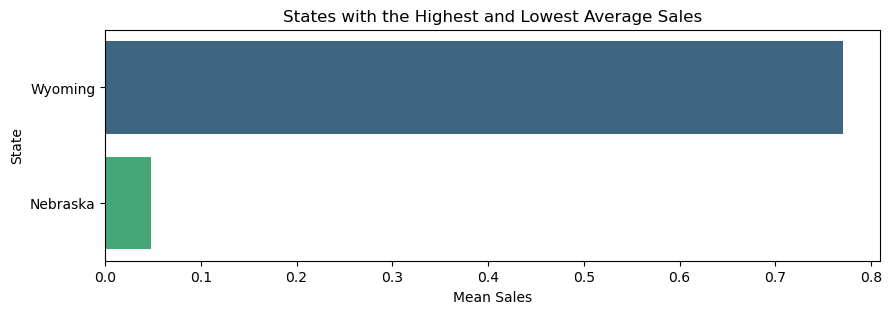

In [55]:
top_state_by_mean_sales = mean_sales_by_state_sorted.head(1)
bottom_state_by_mean_sales = mean_sales_by_state_sorted.tail(1)
combined_states_sales = pd.concat([top_state_by_mean_sales, bottom_state_by_mean_sales])

plt.figure(figsize=(10, 3))
sns.barplot(x='Sales', y='State', data=combined_states_sales, palette='viridis')
plt.title('States with the Highest and Lowest Average Sales')
plt.xlabel('Mean Sales')
plt.ylabel('State')
plt.show()